## Pollution in India
Air pollution is a serious concern in today's world especially in India. 21 out of 30 most polluted cities in the world, are located in India as per 2019 data. The major pollutants are sulfur-dioxide (SO2), nitrogen dioxide (NO2), suspended particulate matter (SPM), respirable suspended particulate matter (RSPM), and particulate matter below 2.5 micrometer (PM2.5). Those pollution measurements between 1990 to 2015 made at different locations in India have been used here fore exploratory analysis. A brief description of each polluatnt is given below.

Sulfur dioxide gas is formed when fuel containing sulfur (mainly coal and oil) is burned (e.g., for electricity generation) and during metal smelting and other industrial processes. High concentrations of SO2 are associated with multiple health and environmental effects. The highest concentrations of SO2 have been recorded in the vicinity of large industrial facilities. SO2 emissions are an important environmental
issue because they are a major precursor to ambient PM2.5 concentrations.

Nitrogen dioxide is produced as a result of road traffic and other fossil fuel combustion processes. Its presence in air contributes to the formation and modification of other air pollutants, such as ozone and particulate matter, and to acid rain.

Small suspended particles less than 2.5 micrometers in diameter pose the greatest problems, because they can get deep into your lungs, and some may even get into your bloodstream. Exposure to such particles can affect both your lungs and your heart. Numerous scientific studies have linked particle pollution exposure to a variety of problems, including: premature death in people with heart or lung disease, nonfatal heart attacks, irregular heartbeat, aggravated asthma, decreased lung function, increased respiratory symptoms, such as irritation of the airways, coughing or difficulty breathing and so on.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [106]:
#df = pd.read_csv('/kaggle/input/india-air-quality-data/data.csv' , encoding='mac_roman')
df = pd.read_csv('C:/Users/manas/Desktop/Kaggle projects/Air pollution/data.csv', encoding='mac_roman')
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [107]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation

In [108]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

The stn_code and agency won't be useful for our analysis. The date and sampling_date gives similar information. For now we can ignore location_monitoring_station as we may not need that granular detail

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [110]:
#Missing values for each feature
df.isna().sum().sort_values(ascending=False)

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
location                            3
sampling_date                       3
state                               0
dtype: int64

For all pollutant data many records are missing. Often a station does not record all type of pollutants. 

In [111]:
# remove data where location is NaN
df = df.dropna(axis=0, subset=['location'])
df.isna().sum().sort_values(ascending=False)

pm2_5                          426425
spm                            237384
agency                         149478
stn_code                       144074
rspm                            40219
so2                             34643
location_monitoring_station     27488
no2                             16230
type                             5390
date                                4
location                            0
state                               0
sampling_date                       0
dtype: int64

In [437]:
df.so2.describe()

count    401096.000000
mean         10.829414
std          11.177187
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

In [438]:
df.no2.describe()

count    419509.000000
mean         25.809623
std          18.503086
min           0.000000
25%          14.000000
50%          22.000000
75%          32.200000
max         876.000000
Name: no2, dtype: float64

In [439]:
df.spm.describe()

count    198355.000000
mean        220.783480
std         151.395457
min           0.000000
25%         111.000000
50%         187.000000
75%         296.000000
max        3380.000000
Name: spm, dtype: float64

There are extreme values in all cases. Since these are measured data, I assume those are real values. Also, I won't replace the NaN values as I will mostly work with average data rather than actual data point.

## How area type can affect pollution level
In general industrial area have higher pollution level. However, even moderate pollution level can affect the life at sensitive area. Within our dataset four data types are provided: Residential, Industrial, Sensitive and RIRUO. We don't have details about RIRUO (Residential, industrial, rural, urban other?). So it is kept as a separate category.

In [113]:
# type: The type of area where the measurement was made.
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

We have repeat of industrial area, sensitive area, residential area and so on. We have to merge them before we proceed.

In [114]:
df['type'].loc[(df['type']=='Residential, Rural and other Areas') | (df['type']=='Residential and others')] = 'Residential'

In [458]:
# Let's assume 'RIRUO' is also Residential. There are only 3 standardized categories for area in general.
df['type'].loc[(df['type']=='RIRUO')]= 'Residential'

In [115]:
df['type'].loc[(df['type']=='Industrial Area') | (df['type']=='Industrial Areas')] = 'Industrial'

In [116]:
df['type'].loc[(df['type']=='Sensitive Area') | (df['type']=='Sensitive Areas')] = 'Sensitive'

In [459]:
df['type'].value_counts()

Residential    267267
Industrial     148071
Sensitive       15011
Name: type, dtype: int64

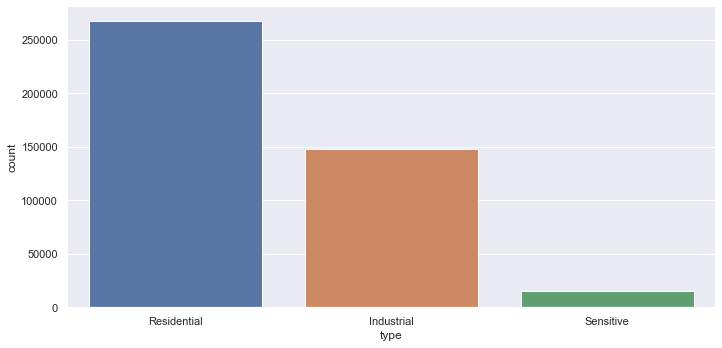

In [460]:
sns.set()
sns.catplot(x='type', kind="count", data=df, height=5, aspect=2)
plt.show()

The highest number of measurements are done at residential areas.

In [461]:
df.head()

,state,location,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year,month
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0,3.0
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0,3.0


Let's look into the pollution level at different area type.

### Sulfur-dioxide

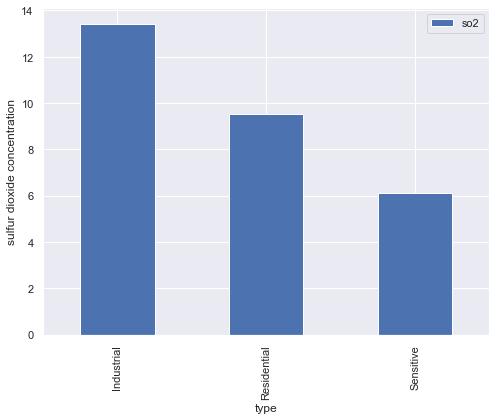

In [462]:
sns.set()
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (8,6))
plt.ylabel('sulfur dioxide concentration')
plt.show()

As expected industrial area have higher concentration of sulfur dioxide.

Plot all pollutants together

In [463]:
# Plot all of them in subplot
so2_type = df[['so2', 'type']].groupby('type').mean()
no2_type = df[['no2', 'type']].groupby('type').mean()
spm_type = df[['spm', 'type']].groupby('type').mean()
rspm_type = df[['rspm', 'type']].groupby('type').mean()
pm_type = df[['pm2_5', 'type']].groupby('type').mean()

In [464]:
pollution_area = pd.DataFrame()
pollution_area[['so2']] = so2_type
pollution_area[['no2']] = no2_type
pollution_area[['spm']] = spm_type
pollution_area[['rspm']] = rspm_type
pollution_area[['pm2_5']] = pm_type
pollution_area.head()

,so2,no2,spm,rspm,pm2_5
type,,,,,
Industrial,13.411339,29.462793,241.366963,122.048402,44.106987
Residential,9.527022,24.079055,208.565628,102.439098,39.494477
Sensitive,6.118603,19.959398,235.139145,99.522692,NaN


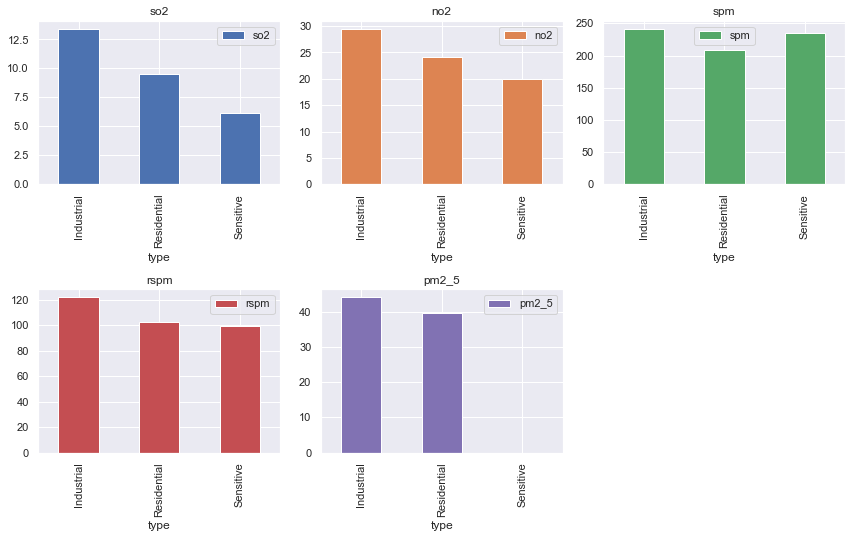

In [465]:
pollution_area.plot.bar(subplots=True, grid=True,
        layout=(4, 3), sharex=False, sharey=False, legend=True, figsize=(12,14))
plt.tight_layout()
plt.show()

As expected, industrial areas are more polluted than other areas.

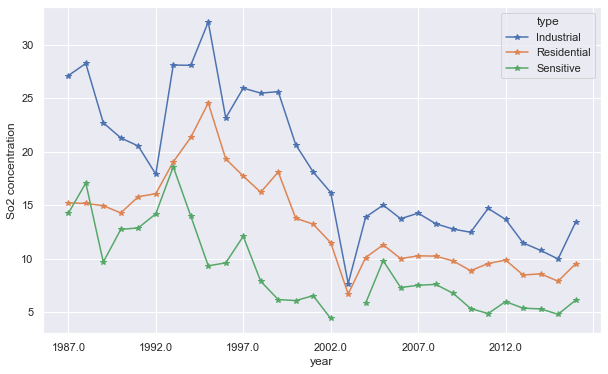

In [466]:
so2_pivot_type = df.pivot_table('so2', index='year',columns=['type'],aggfunc='mean',margins=True).reset_index().drop('All', axis=1).set_index("year")
so2_pivot_type.plot(marker='*', figsize=(10,6))
plt.ylabel('So2 concentration')
plt.show()

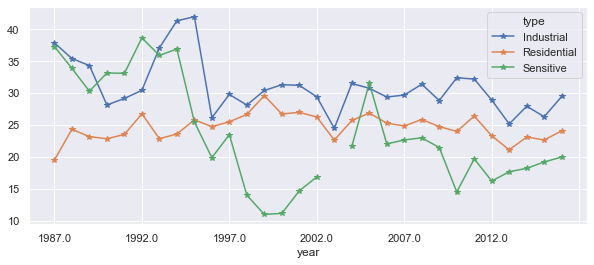

In [467]:
no2_pivot_type = df.pivot_table('no2', index='year',columns=['type'],aggfunc='mean',margins=True).reset_index().drop('All', axis=1).set_index("year")
no2_pivot_type.plot(marker='*', figsize=(10,4))
plt.show()

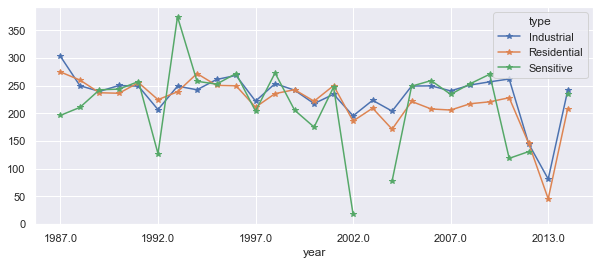

In [468]:
spm_pivot_type = df.pivot_table('spm', index='year',columns=['type'],aggfunc='mean',margins=True).reset_index().drop('All', axis=1).set_index("year")
spm_pivot_type.plot(marker='*', figsize=(10,4))
plt.show()

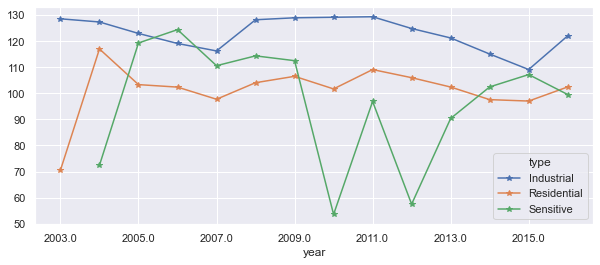

In [469]:
rspm_pivot_type = df.pivot_table('rspm', index='year',columns=['type'],aggfunc='mean',margins=True).reset_index().drop('All', axis=1).set_index("year")
rspm_pivot_type.plot(marker='*', figsize=(10,4))
plt.show()

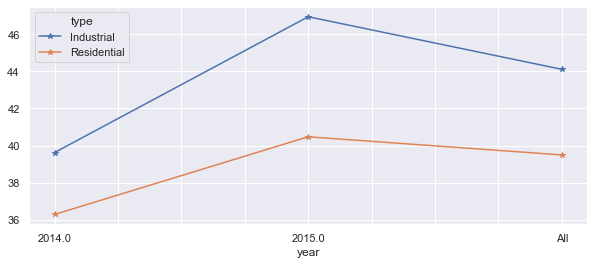

In [470]:
pm_pivot_type = df.pivot_table('pm2_5', index='year',columns=['type'],aggfunc='mean',margins=True).reset_index().drop('All', axis=1).set_index("year")
pm_pivot_type.plot(marker='*', figsize=(10,4))
plt.show()

Among all area type Industrial area have higher pollution. The SO2 concentration decreased with time but other pollutants are fairly consistent over time at all area type.

## Overall trend with time

In [149]:
# changing to datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df.year=df['date'].dt.year
df['year'] = df['date'].dt.year
#del df['stn_code'], df['agency'], df['sampling_date']
df.head()

,state,location,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0


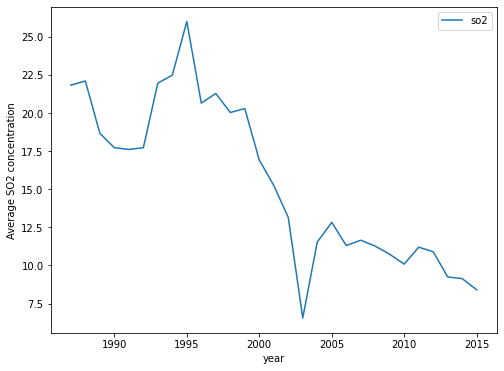

In [152]:
# How on average the so2 concentration is changing with time?
df[['so2', 'year']].groupby(['year']).mean().sort_values(by='year', ascending=False).plot(figsize=(8,6))
plt.ylabel('Average SO2 concentration')
plt.show()

Overall the SO2 concentration is going down. But is it for individual states. 

In [349]:
# Plot all of them in subplot
so2_year = df[['so2', 'year']].groupby('year').mean()
no2_year = df[['no2', 'year']].groupby('year').mean()
spm_year = df[['spm', 'year']].groupby('year').mean()
rspm_year = df[['rspm', 'year']].groupby('year').mean()
pm_year = df[['pm2_5', 'year']].groupby('year').mean()

In [354]:
pollution_year = pd.DataFrame()
pollution_year[['so2']] = so2_year
pollution_year[['no2']] = no2_year
pollution_year[['spm']] = spm_year
pollution_year[['rspm']] = rspm_year
pollution_year[['pm2_5']] = pm_year
#pollution_year[['so2', 'no2', 'spm', 'rspm', 'pm2_5']] = [so2_year, no2_year, spm_year, rspm_year, pm_year]
pollution_year.head()

,so2,no2,spm,rspm,pm2_5
year,,,,,
1987.0,21.827070,30.584545,280.493947,NaN,NaN
1988.0,22.098102,30.606439,248.841845,NaN,NaN
1989.0,18.668066,29.215816,237.764706,NaN,NaN
1990.0,17.723147,25.714482,243.547009,NaN,NaN
1991.0,17.607667,25.986805,242.843709,NaN,NaN


In [ ]:
#lambdafunc = lambda x: pd.Series([x['so2_year'], x['no2_year'], x['spm_year']])
#pollution_year[['so2', 'no2', 'spm']] = pollution_year.apply(lambdafunc, axis=1)

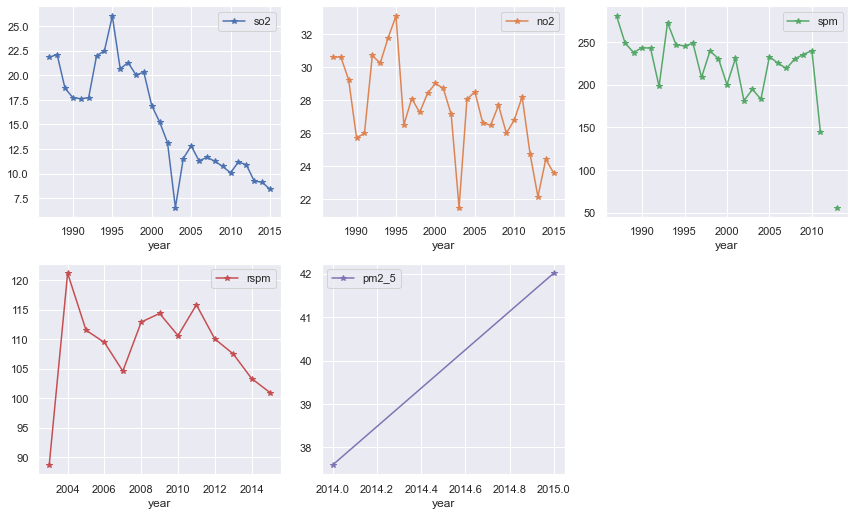

In [357]:
pollution_year.plot(subplots=True, grid=True,
        layout=(4, 3), sharex=False, sharey=False, legend=True, figsize=(12,14), marker='*')
plt.tight_layout()
plt.show()

PM2.5 has only 2 years of data recorded.

### Time series analysis with resampled data
Let's remove the NaN values for all pollutants and resample them at month interval using ffill method.

In [454]:
df_so2 = df[["date", "so2"]]
df_so2 = df_so2.set_index("date")
df_so2 = df_so2.dropna()
df_no2 = df[["date", "no2"]]
df_no2 = df_no2.set_index("date")
df_no2 = df_no2.dropna()
df_spm = df[["date", "spm"]]
df_spm = df_spm.set_index("date")
df_spm = df_spm.dropna()
df_rspm = df[["date", "rspm"]]
df_rspm = df_rspm.set_index("date")
df_rspm = df_rspm.dropna()

df_so2_resample = df_so2.resample(rule = "M").mean().ffill()
df_no2_resample = df_no2.resample(rule = "M").mean().ffill()
df_spm_resample = df_spm.resample(rule = "M").mean().ffill()
df_rspm_resample = df_rspm.resample(rule = "M").mean().ffill()

pollution_resample = pd.DataFrame()
pollution_resample[['so2']]=df_so2_resample
pollution_resample[['no2']]=df_no2_resample
#pollution_resample[['spm']]=df_spm_resample
#pollution_resample[['rspm']]=df_rspm_resample

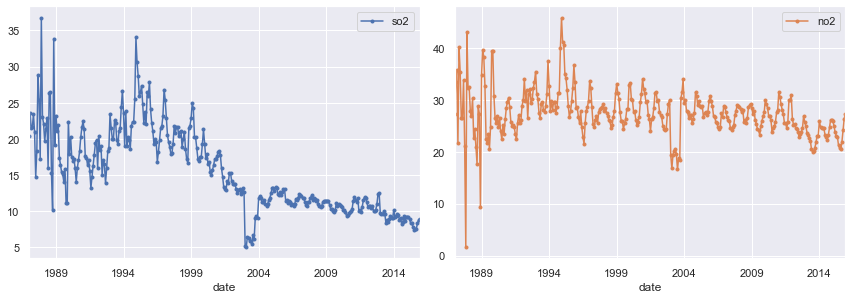

In [456]:
pollution_resample.plot(subplots=True, grid=True,
        layout=(2, 2), sharex=False, sharey=False, legend=True, figsize=(12,8), marker='.')
plt.tight_layout()
plt.show()

## State level pollution

In [358]:
state_names = df.state.unique()
print(state_names, len(state_names))

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal'] 34


A total of 34 states have recorded pollution data. Lets look into theose.

On November 9, 2000, the state of Uttaranchal was carved out of Uttar Pradesh, and in January 2007 the new state changed its name to Uttarakhand. Jharkhand was formed in 2000, from Bihar. Chhattisgarh was formed on 1 November 2000. Earlier it was under Madhya Pradesh. Telengana was formed in 2014 from Andhra Pradesh. We will merge those states for simplicity.

In [366]:
# Club the states which were together 
df['state'].loc[(df['state']=='Uttaranchal') | (df['state']=='Uttarakhand')] = 'Uttar Pradesh'
df['state'].loc[(df['state']=='Jharkhand')] = 'Bihar'
df['state'].loc[(df['state']=='Chhattisgarh')] = 'Madhya Pradesh'
df['state'].loc[(df['state']=='Telangana')] = 'Andhra Pradesh'
print(len(df.state.unique()), df.state.unique())

29 ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Madhya Pradesh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Karnataka'
 'Kerala' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Uttar Pradesh' 'West Bengal']


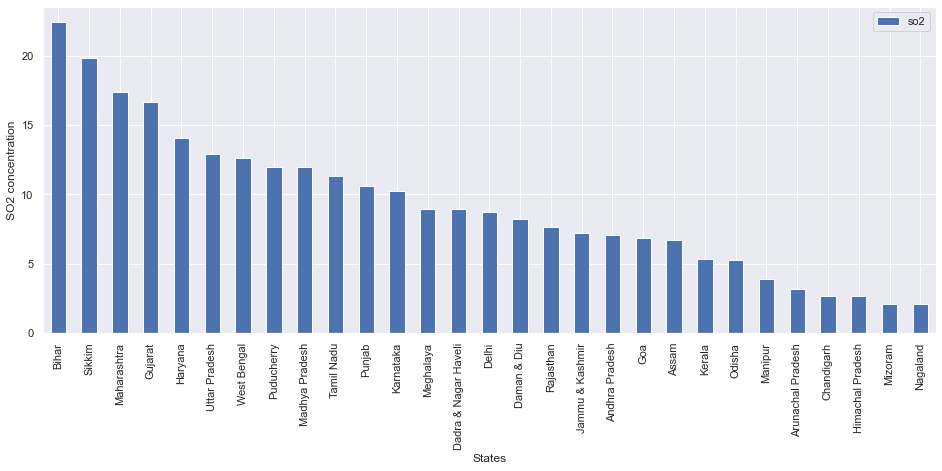

In [363]:
sns.set()
df[['so2', 'state']].groupby(['state']).mean().sort_values('so2', ascending=False).plot.bar(figsize=(16,6))
plt.ylabel('SO2 concentration')
plt.xlabel('States')
plt.show()

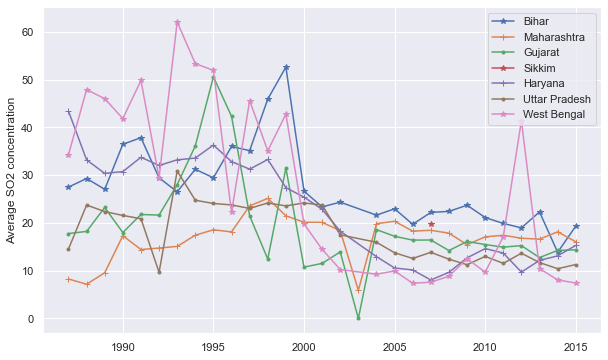

In [386]:
# Lets look into the states with highest concern
df1 = df[['so2', 'year']].loc[df['state']=='Bihar'].groupby('year').mean().sort_values(by='year', ascending=False)
df2 = df[['so2', 'year']].loc[df['state']=='Maharashtra'].groupby('year').mean().sort_values(by='year', ascending=False)
df3 = df[['so2', 'year']].loc[df['state']=='Gujarat'].groupby('year').mean().sort_values(by='year', ascending=False)
df4 = df[['so2', 'year']].loc[df['state']=='Sikkim'].groupby('year').mean().sort_values(by='year', ascending=False)
df5 = df[['so2', 'year']].loc[df['state']=='Haryana'].groupby('year').mean().sort_values(by='year', ascending=False)
df6 = df[['so2', 'year']].loc[df['state']=='Uttar Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)
df7 = df[['so2', 'year']].loc[df['state']=='West Bengal'].groupby('year').mean().sort_values(by='year', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(df1['so2'], label='Bihar', marker='*')
plt.plot(df2['so2'], label='Maharashtra', marker='+')
plt.plot(df3['so2'], label='Gujarat', marker='.')
plt.plot(df4['so2'], label='Sikkim', marker='*')
plt.plot(df5['so2'], label='Haryana', marker='+')
plt.plot(df6['so2'], label='Uttar Pradesh', marker='.')
plt.plot(df7['so2'], label='West Bengal', marker='*')

plt.legend(loc='best')
plt.ylabel('Average SO2 concentration')
plt.show()


SO2 concentration in most states decreased over time. But Maharashtra does not show much change.

### Nitrogen Dioxide

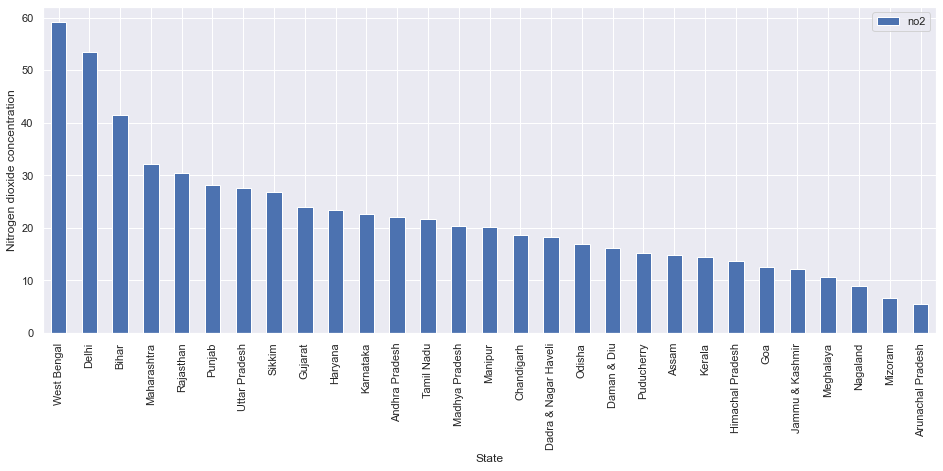

In [370]:
# lets look statewise
df[['no2', 'state']].groupby('state').mean().sort_values('no2', ascending=False).plot.bar(figsize=(16,6))
plt.xlabel('State')
plt.ylabel('Nitrogen dioxide concentration')
plt.show()

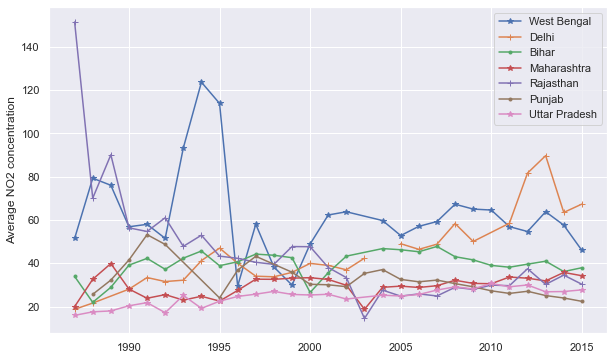

In [384]:
#Lets look into states with highest pollution
df1 = df[['no2', 'year']].loc[df['state']=='West Bengal'].groupby('year').mean().sort_values(by='year', ascending=False)
df2 = df[['no2', 'year']].loc[df['state']=='Delhi'].groupby('year').mean().sort_values(by='year', ascending=False)
df3 = df[['no2', 'year']].loc[df['state']=='Bihar'].groupby('year').mean().sort_values(by='year', ascending=False)
df4 = df[['no2', 'year']].loc[df['state']=='Maharashtra'].groupby('year').mean().sort_values(by='year', ascending=False)
df5 = df[['no2', 'year']].loc[df['state']=='Rajasthan'].groupby('year').mean().sort_values(by='year', ascending=False)
df6 = df[['no2', 'year']].loc[df['state']=='Punjab'].groupby('year').mean().sort_values(by='year', ascending=False)
df7 = df[['no2', 'year']].loc[df['state']=='Uttar Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(df1['no2'], label='West Bengal', marker= '*')
plt.plot(df2['no2'], label='Delhi', marker='+')
plt.plot(df3['no2'], label='Bihar', marker='.')
plt.plot(df4['no2'], label='Maharashtra', marker='*')
plt.plot(df5['no2'], label='Rajasthan', marker='+')
plt.plot(df6['no2'], label='Punjab', marker='.')
plt.plot(df7['no2'], label='Uttar Pradesh', marker='*')

plt.legend(loc='best')
plt.ylabel('Average NO2 concentration')
plt.show()

NO2 concentration in Delhi is increasing with time.

### Suspended particulate matter

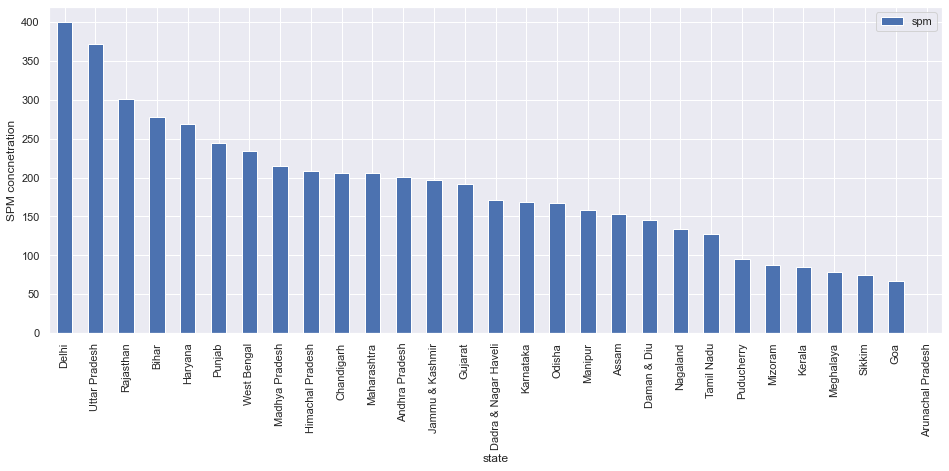

In [375]:
df[['spm', 'state']].groupby('state').mean().sort_values('spm', ascending=False).plot.bar(figsize=(16,6))
plt.ylabel('SPM concnetration')
plt.show()

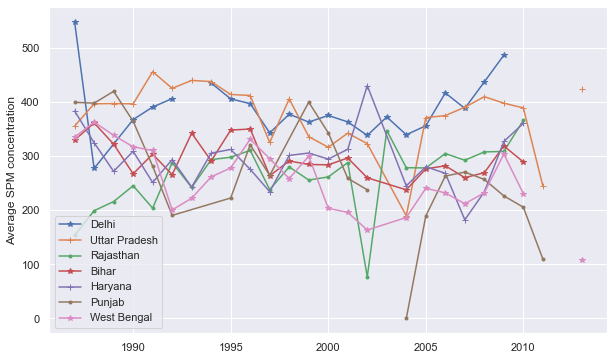

In [382]:
#Lets look into states with highest pollution
df1 = df[['spm', 'year']].loc[df['state']=='Delhi'].groupby('year').mean().sort_values(by='year', ascending=False)
df2 = df[['spm', 'year']].loc[df['state']=='Uttar Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)
df3 = df[['spm', 'year']].loc[df['state']=='Rajasthan'].groupby('year').mean().sort_values(by='year', ascending=False)
df4 = df[['spm', 'year']].loc[df['state']=='Bihar'].groupby('year').mean().sort_values(by='year', ascending=False)
df5 = df[['spm', 'year']].loc[df['state']=='Haryana'].groupby('year').mean().sort_values(by='year', ascending=False)
df6 = df[['spm', 'year']].loc[df['state']=='Punjab'].groupby('year').mean().sort_values(by='year', ascending=False)
df7 = df[['spm', 'year']].loc[df['state']=='West Bengal'].groupby('year').mean().sort_values(by='year', ascending=False)

#plt.figure(10,6)
plt.figure(figsize=(10,6))
plt.plot(df1['spm'], label='Delhi', marker= '*')
plt.plot(df2['spm'], label='Uttar Pradesh', marker='+')
plt.plot(df3['spm'], label='Rajasthan', marker='.')
plt.plot(df4['spm'], label='Bihar', marker='*')
plt.plot(df5['spm'], label='Haryana', marker='+')
plt.plot(df6['spm'], label='Punjab', marker='.')
plt.plot(df7['spm'], label='West Bengal', marker='*')

plt.legend(loc='lower left')
plt.ylabel('Average SPM concentration')
plt.show()

SPM concentration is fairly constant over time

### Respirable suspended particulate matter

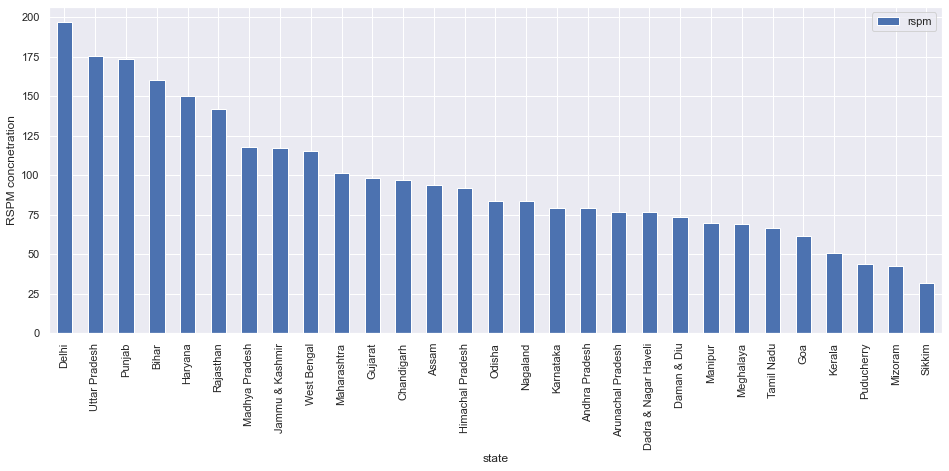

In [387]:
df[['rspm', 'state']].groupby('state').mean().sort_values('rspm', ascending=False).plot.bar(figsize=(16,6))
plt.ylabel('RSPM concnetration')
plt.show()

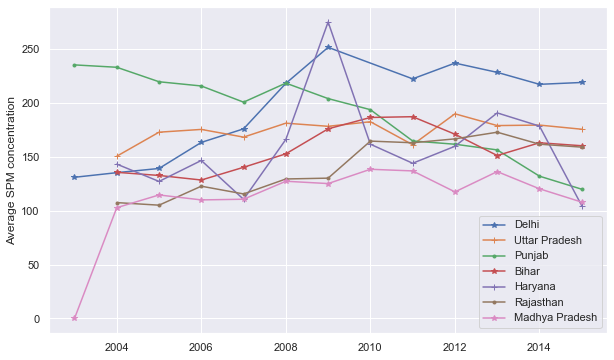

In [388]:
#Lets look into states with highest pollution Bihar Rajasthan
df1 = df[['rspm', 'year']].loc[df['state']=='Delhi'].groupby('year').mean().sort_values(by='year', ascending=False)
df2 = df[['rspm', 'year']].loc[df['state']=='Uttar Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)
df3 = df[['rspm', 'year']].loc[df['state']=='Punjab'].groupby('year').mean().sort_values(by='year', ascending=False)
df4 = df[['rspm', 'year']].loc[df['state']=='Bihar'].groupby('year').mean().sort_values(by='year', ascending=False)
df5 = df[['rspm', 'year']].loc[df['state']=='Haryana'].groupby('year').mean().sort_values(by='year', ascending=False)
df6 = df[['rspm', 'year']].loc[df['state']=='Rajasthan'].groupby('year').mean().sort_values(by='year', ascending=False)
df7 = df[['rspm', 'year']].loc[df['state']=='Madhya Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)


plt.figure(figsize=(10,6))
plt.plot(df1['rspm'], label='Delhi', marker= '*')
plt.plot(df2['rspm'], label='Uttar Pradesh', marker='+')
plt.plot(df3['rspm'], label='Punjab', marker='.')
plt.plot(df4['rspm'], label='Bihar', marker='*')
plt.plot(df5['rspm'], label='Haryana', marker='+')
plt.plot(df6['rspm'], label='Rajasthan', marker='.')
plt.plot(df7['rspm'], label='Madhya Pradesh', marker='*')

plt.legend(loc='best')
plt.ylabel('Average SPM concentration')
plt.show()

The RSPM concentration in Delhi has been increased with time while it is going down in Punjab.

### Particulate Matter 2.5

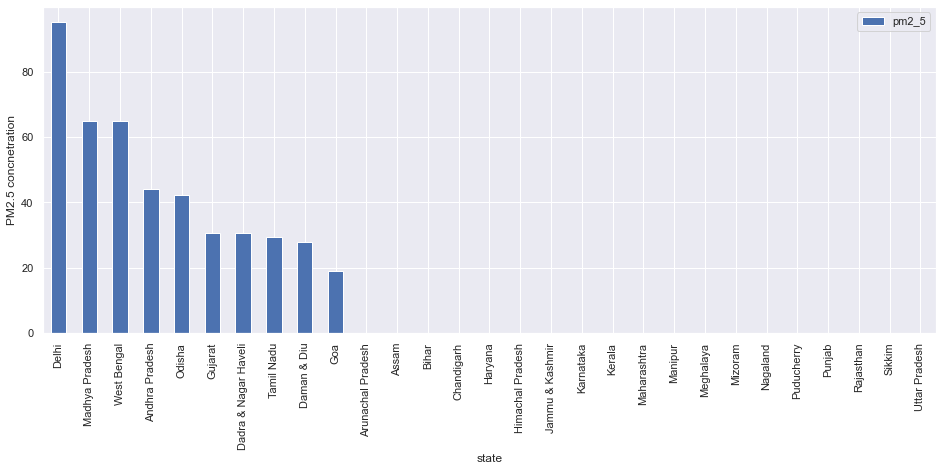

In [389]:
df[['pm2_5', 'state']].groupby('state').mean().sort_values('pm2_5', ascending=False).plot.bar(figsize=(16,6))
plt.ylabel('PM2.5 concnetration')
plt.show()

We don't have PM 2.5 concentration for many states.

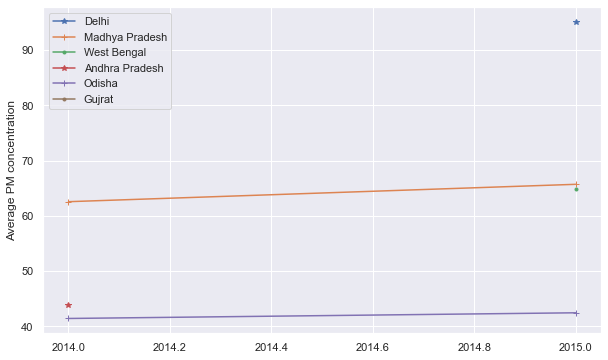

In [391]:
#Lets look into states with highest pollution Madhya Pradesh, West Bengal, Andhra Pradesh, Odisha, Gujrat
df1 = df[['pm2_5', 'year']].loc[df['state']=='Delhi'].groupby('year').mean().sort_values(by='year', ascending=False)
df2 = df[['pm2_5', 'year']].loc[df['state']=='Madhya Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)
df3 = df[['pm2_5', 'year']].loc[df['state']=='West Bengal'].groupby('year').mean().sort_values(by='year', ascending=False)
df4 = df[['pm2_5', 'year']].loc[df['state']=='Andhra Pradesh'].groupby('year').mean().sort_values(by='year', ascending=False)
df5 = df[['pm2_5', 'year']].loc[df['state']=='Odisha'].groupby('year').mean().sort_values(by='year', ascending=False)
df6 = df[['pm2_5', 'year']].loc[df['state']=='Gujrat'].groupby('year').mean().sort_values(by='year', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(df1['pm2_5'], label='Delhi', marker= '*')
plt.plot(df2['pm2_5'], label='Madhya Pradesh', marker='+')
plt.plot(df3['pm2_5'], label='West Bengal', marker='.')
plt.plot(df4['pm2_5'], label='Andhra Pradesh', marker='*')
plt.plot(df5['pm2_5'], label='Odisha', marker='+')
plt.plot(df6['pm2_5'], label='Gujrat', marker='.')

plt.legend(loc='best')
plt.ylabel('Average PM concentration')
plt.show()

PM data is available only for 2014 and 2015 for few states.

### Pivot Table
Using pivot table we can see the change for all states

In [393]:
so2_pivot = df.pivot_table('so2', index='state',columns=['year'],aggfunc='mean',margins=True)

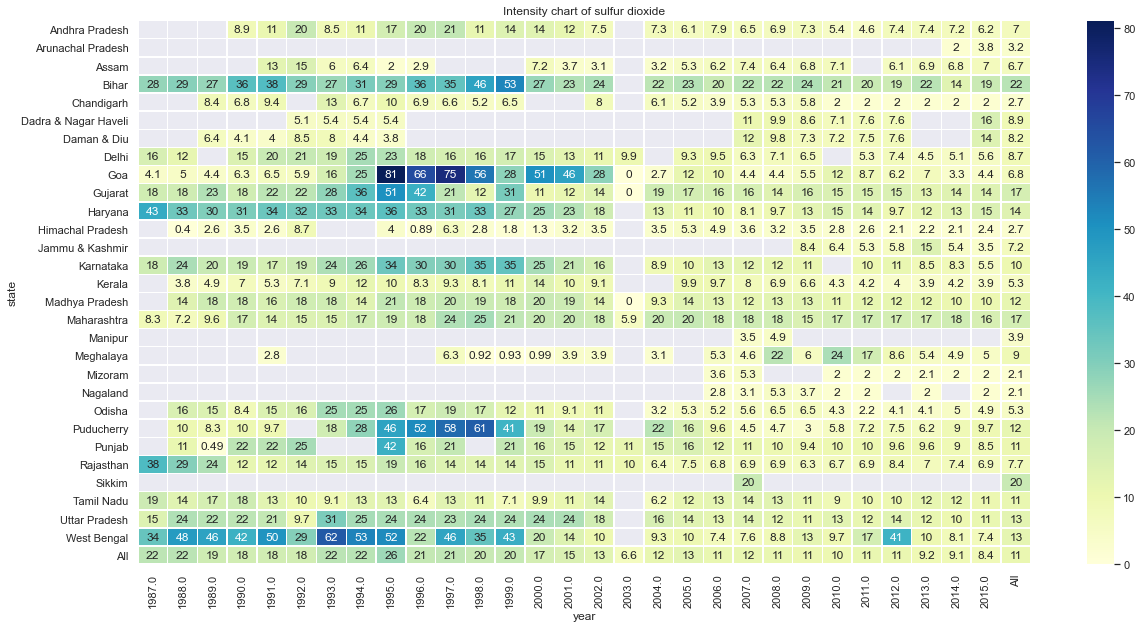

In [395]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(so2_pivot,ax = ax,annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Intensity chart of sulfur dioxide')
plt.show()

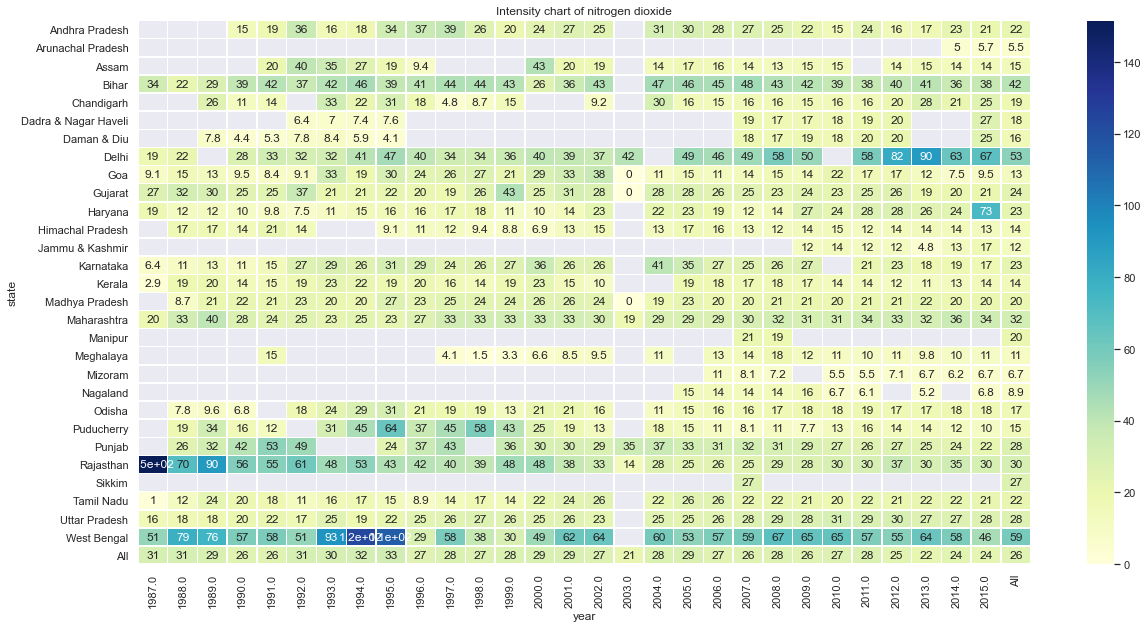

In [396]:
fig, ax = plt.subplots(figsize=(20,10))
no2_pivot = df.pivot_table('no2', index='state',columns=['year'],aggfunc='mean',margins=True)
sns.heatmap(no2_pivot,ax = ax,annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Intensity chart of nitrogen dioxide')
plt.show()

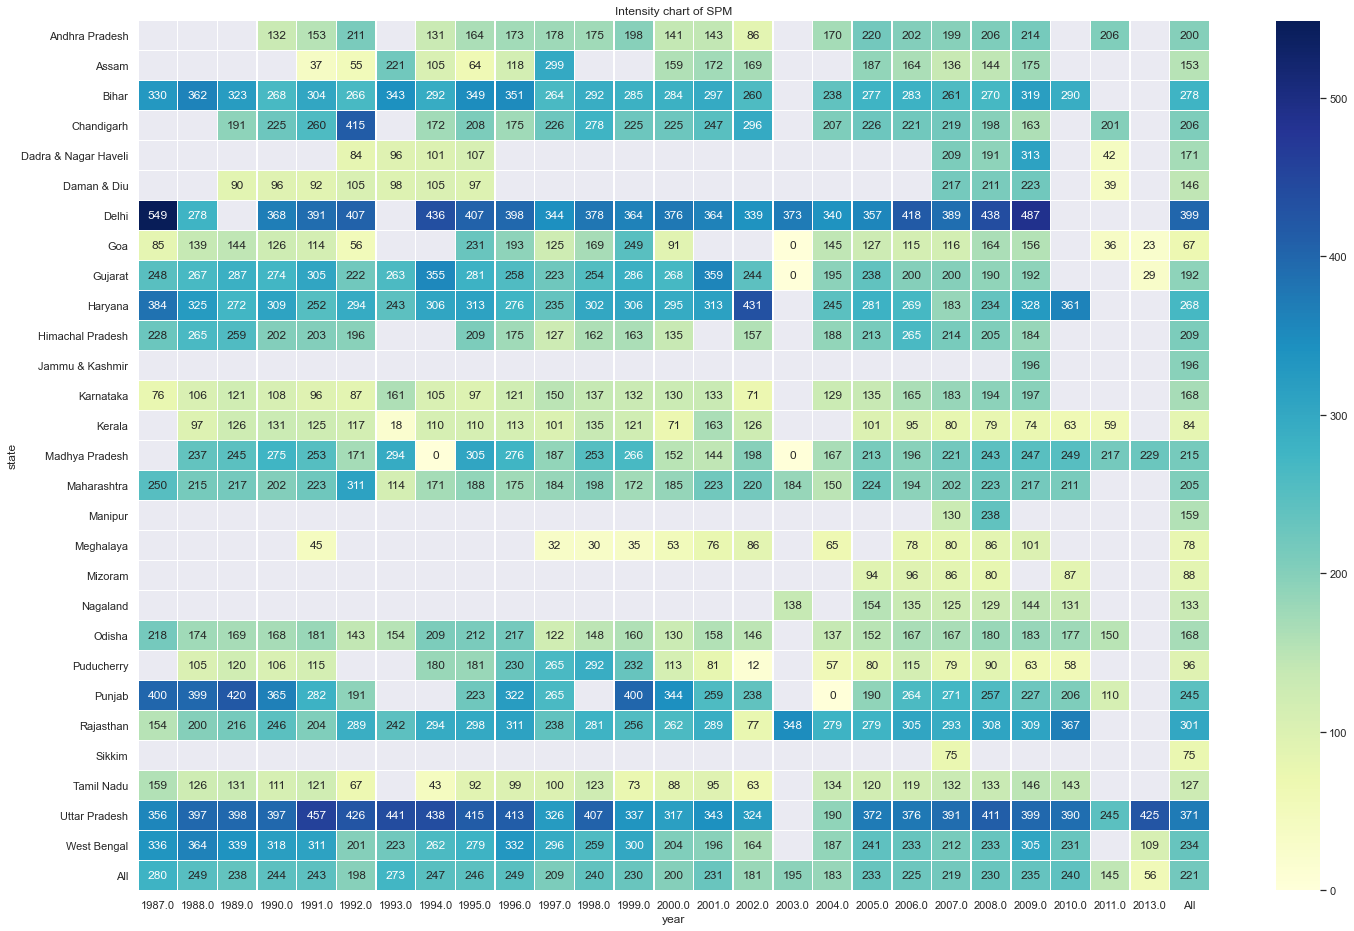

In [399]:
fig, ax = plt.subplots(figsize=(24,16))
spm_pivot = df.pivot_table('spm', index='state',columns=['year'],aggfunc='mean',margins=True)
sns.heatmap(spm_pivot,ax = ax, annot=True, fmt='0.0f', annot_kws={"size": 12}, linewidths=.5, cmap="YlGnBu")
plt.title('Intensity chart of SPM')
plt.show()

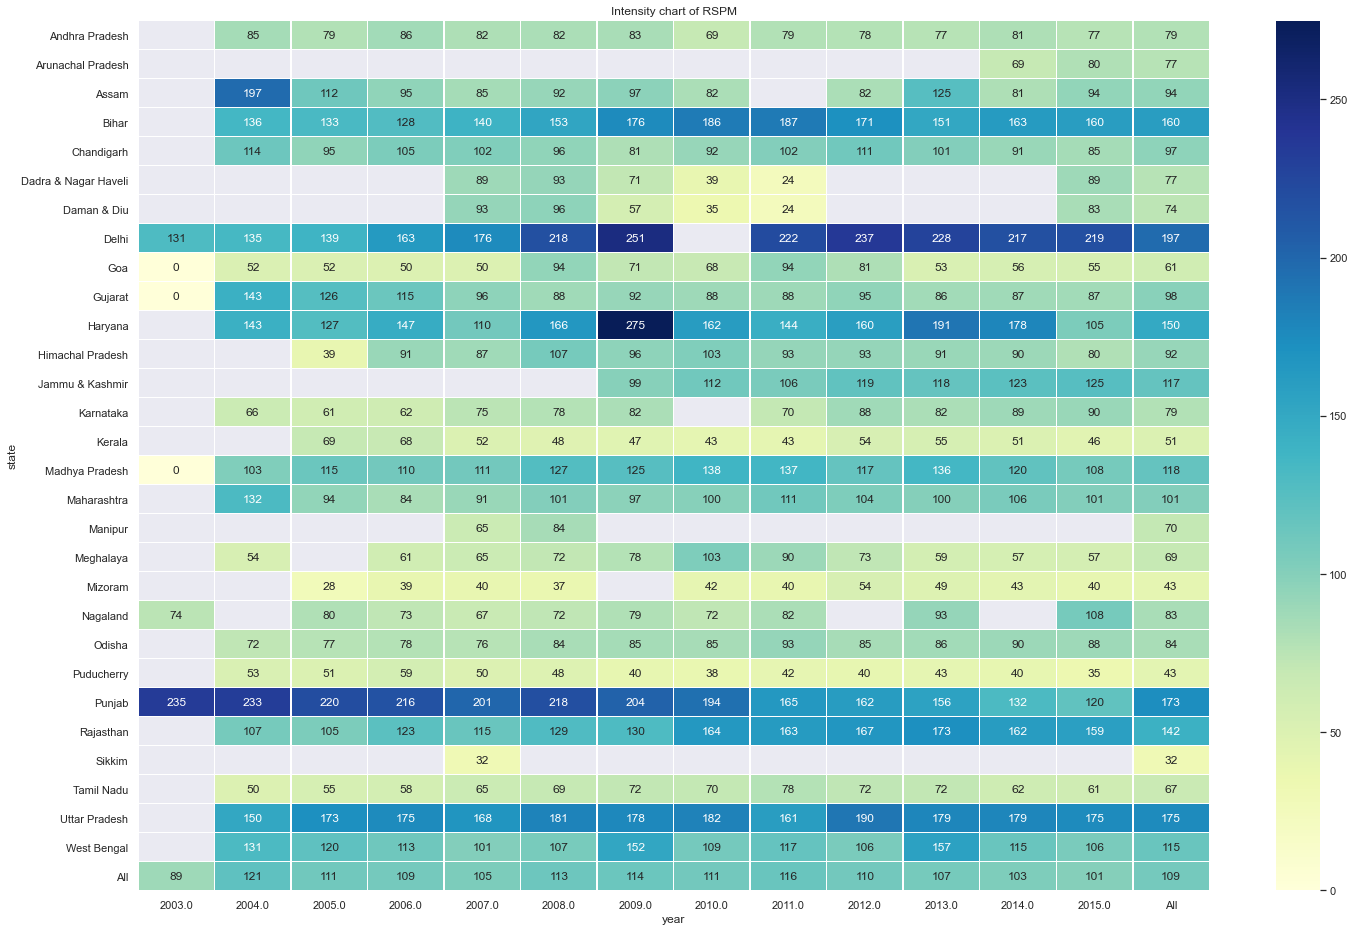

In [400]:
fig, ax = plt.subplots(figsize=(24,16))
rspm_pivot = df.pivot_table('rspm', index='state',columns=['year'],aggfunc='mean',margins=True)
sns.heatmap(rspm_pivot,ax = ax, annot=True, fmt='0.0f', annot_kws={"size": 12}, linewidths=.5, cmap="YlGnBu")
plt.title('Intensity chart of RSPM')
plt.show()

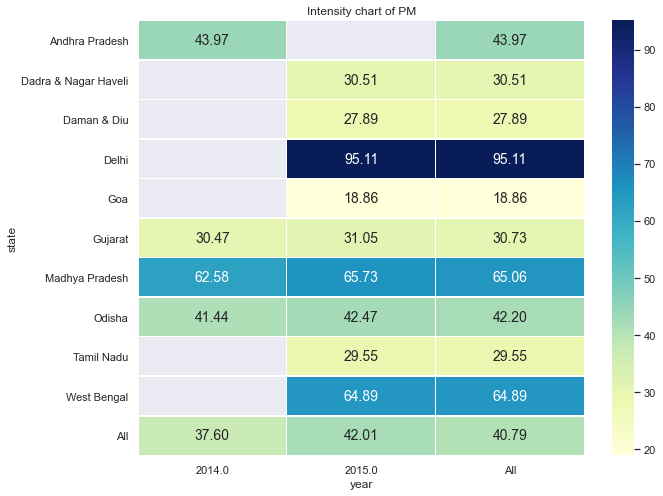

In [404]:
fig, ax = plt.subplots(figsize=(10,8))
pm_pivot = df.pivot_table('pm2_5', index='state',columns=['year'],aggfunc='mean',margins=True)
sns.heatmap(pm_pivot,ax = ax, annot=True, fmt='0.2f', annot_kws={"size": 14}, linewidths=.5, cmap="YlGnBu")
plt.title('Intensity chart of PM')
plt.show()

What if we put all the data together in time series.

In [405]:
#Trends by regions
so2_pivot_reg = df.pivot_table('so2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
so2_pivot_reg = so2_pivot_reg.drop('All', axis=1)
so2_pivot_reg = so2_pivot_reg.set_index("year")
so2_pivot.shape

(30, 30)

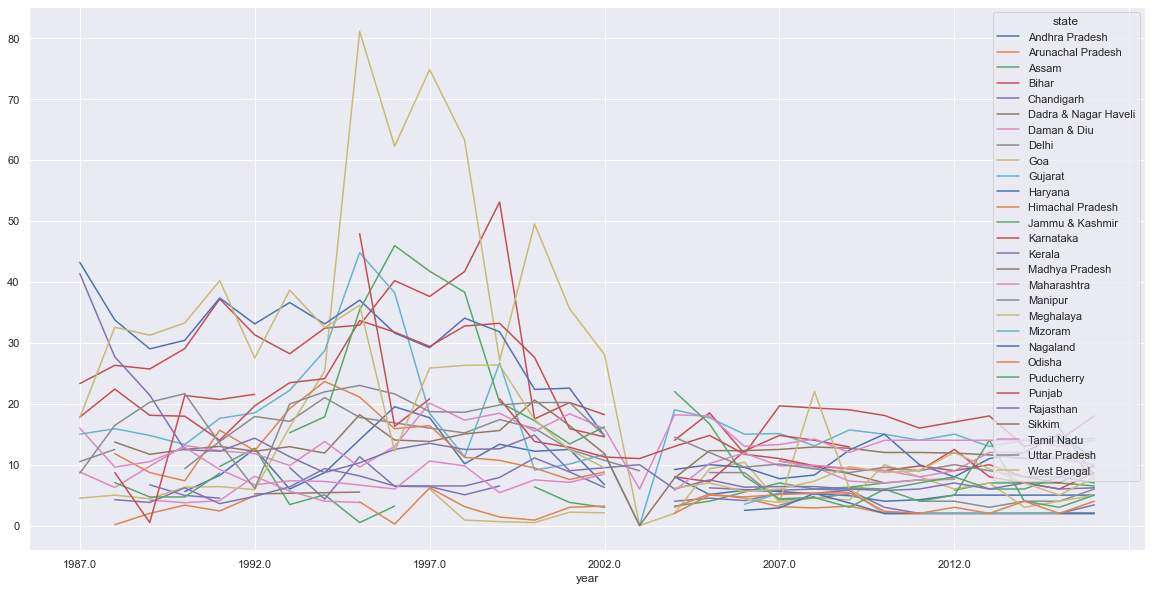

In [406]:
so2_pivot_reg.plot(figsize=(20,10))
plt.show()

This looks much crowded. It is difficult to extract information from this plot.

### Seasonal Variation 

In [272]:
# Checking seasonality
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['month'] = df['date'].dt.month
df.head()

,state,location,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year,month
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0,3.0
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0,3.0


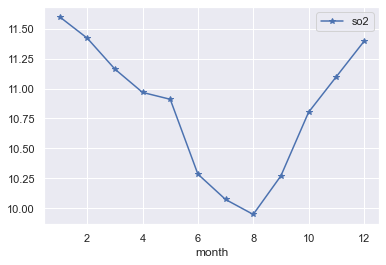

In [290]:
sns.set()
monthly_so2 = df[['so2', 'month']].groupby('month').mean()
monthly_so2.plot(marker='*')
plt.show()

In [416]:
#create a dataframe with each month average of all pollutants
monthly_no2 = df[['no2', 'month']].groupby('month').mean()
monthly_spm = df[['spm', 'month']].groupby('month').mean()
monthly_rspm = df[['rspm', 'month']].groupby('month').mean()
monthly_pm = df[['pm2_5', 'month']].groupby('month').mean()

monthly = pd.DataFrame()
monthly[['so2']] = monthly_so2
monthly[['no2']] = monthly_no2
monthly[['spm']] = monthly_spm
monthly[['rspm']] = monthly_rspm
monthly[['pm2_5']] = monthly_pm
monthly.head()

,so2,no2,spm,rspm,pm2_5
month,,,,,
1.0,11.599157,28.055267,245.745248,122.435227,47.941239
2.0,11.420547,27.194877,239.597104,117.076940,45.081876
3.0,11.162302,26.405035,237.053027,115.227345,42.122834
4.0,10.967541,25.728687,236.505825,112.104296,41.075911
5.0,10.910268,25.376727,232.964980,111.689892,40.595490


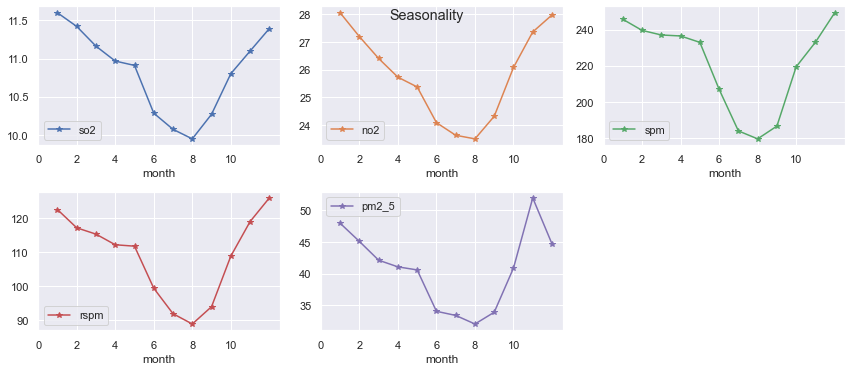

In [417]:
monthly.plot(subplots=True, grid=True, title="Seasonality",
        layout=(4, 3), sharex=False, sharey=False, legend=True,
            xticks=np.arange(0, 12, 2), figsize=(12,10), marker='*')
plt.tight_layout()
plt.show()

For all pollutants there is a strong seasonality. The pollution is lowest during August (monsoon season in India).

### Correlation among pollutants

In [445]:
# pearson correlation coefficient
df[['so2', 'no2', 'spm', 'rspm', 'pm2_5']].corr()

,so2,no2,spm,rspm,pm2_5
so2,1.000000,0.340555,0.148325,0.165325,0.035980
no2,0.340555,1.000000,0.326170,0.369923,0.509357
spm,0.148325,0.326170,1.000000,0.801752,NaN
rspm,0.165325,0.369923,0.801752,1.000000,0.754709
pm2_5,0.035980,0.509357,NaN,0.754709,1.000000


Particular matters of different size ranges have strong correlations. Also Nitrogen dioxide and PM2.5 shows some positive correlation. Let's plot them as xy scatter plot to visualize the linear relationship.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


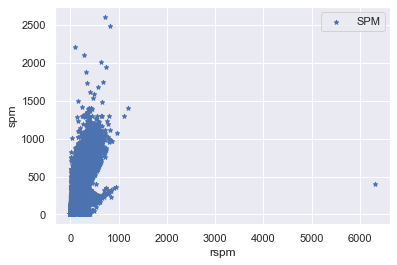

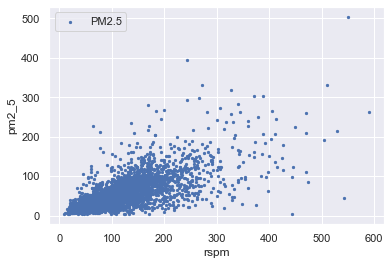

In [451]:
df.plot.scatter('rspm', 'spm', marker='*', label='SPM')
df.plot.scatter('rspm', 'pm2_5', marker='.', label='PM2.5')
plt.legend(loc='best')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


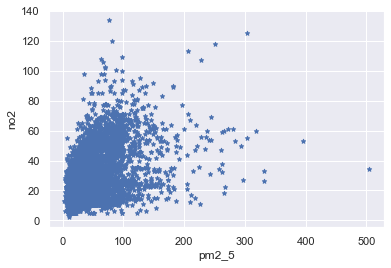

In [453]:
df.plot.scatter('pm2_5', 'no2', marker='*')
plt.show()